<a href="https://colab.research.google.com/github/Bokyoung-00/machine_learning_education/blob/master/kaggle_house_price_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [1]:
import pandas as pd
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

colnames_dict = {"1stFlrSF": "my1stFlrSF", "2ndFlrSF": "my2ndFlrSF", "3SsnPorch": "my3SsnPorch"}
df_train = df_train.rename(columns=colnames_dict)
df_test = df_test.rename(columns=colnames_dict)

In [ ]:
pd.options.display.max_columns= None
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,my1stFlrSF,my2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,my3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_train.shape

(1460, 81)

In [ ]:
def check_fill_na(data):
    new_df = data.copy()
    

In [ ]:
def fill_missing(df, cols, val):
    """ val 입력값을 넣는다. """
    for col in cols:
        df[col] = df[col].fillna(val)

def fill_missing_with_mode(df, cols):
    """ 최대 빈도수를 넣는다. """
    for col in cols:
        df[col] = df[col].fillna(df[col].mode()[0])
        
def addlogs(res, cols):
    """ 로그 변환 """
    m = res.shape[1]
    for c in cols:
        res = res.assign(newcol=pd.Series(np.log(1.01+res[c])).values)   
        res.columns.values[m] = c + '_log'
        m += 1
    return res

In [ ]:
numeric_features = df_train.select_dtypes(include=[np.number])
print(numeric_features.columns)
print("The total number of numeric features are: ", len(numeric_features.columns))

categorical_features = df_train.select_dtypes(exclude=[np.number])
categorical_features.columns
print("The total number of numeric features are: ", len(categorical_features.columns))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'my1stFlrSF', 'my2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'my3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The total number of numeric features are:  38
The total number of numeric features are:  43


### 연도 데이터 탐색 개요

- 지난시간에 각 데이터에서 categorical_features와 numeric_features를 각각 추출하는 방법에 대해 배웠다.

- categorical_features: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilitif

- numeric_features:‘Id’, ‘MSSubClass’, ‘LotFrontage’, ‘LotArea’, ‘OverallQual’, ‘OverallCond’, ‘YearBuilt’, ‘YearRemodAdd’, ‘MasVnrArea’, ‘BsmtFinSF1’, ‘BsmtFinSF2’, ‘BsmtUnfSF’, ‘TotalBsmtSF’, ‘1stFlrSF’, ‘2ndFlrSF’, ‘LowQualFinSF’, ‘GrLivArea’, ‘BsmtFullBath’, ‘BsmtHalfBath’, ‘FullBath’, ‘HalfBath’, ‘BedroomAbvGr’, ‘KitchenAbvGr’, ‘TotRmsAbvGrd’, ‘Fireplaces’, ‘GarageYrBlt’, ‘GarageCars’, ‘GarageArea’, ‘WoodDeckSF’, ‘OpenPorchSF’, ‘EnclosedPorch’, ‘3SsnPorch’, ‘ScreenPorch’, ‘PoolArea’, ‘MiscVal’, ‘MoSold’, ‘YrSold’, ‘SalePrice’

- 여기에서 우선 categorical_features는 논의에서 제외한다.

- 이 중에서, 우선 numeric_features를 다시 살펴본다.

 - 우선 훈련데이터의 ID는 삭제한다.
    또한, 종속변수인 salesprice는 테스트 데이터에는 존재하지 않는다.
    그럼 결과적으로 36개의 numeric_features만 남게 된다.
    36개의 features만 남았다.

  - 여기에서 유심히 살펴보면 Year과 관련된 features가 보인다.
    특히 매출과 관련된 데이터를 다루는데 있어서, 연,월,일은 매우 중요하다. 패턴을 찾아서 특정 변수만 추출하는 코드가 필요하다.

- YearBuilt, YearRemodAdd, GarageYrBlt, YrSold만 추출해보자.

In [ ]:
numeric_features = df_train.select_dtypes(include=[np.number])
print(numeric_features.columns)
print("The total number of numeric features are: ", len(numeric_features.columns))

year_fea = [fea for fea in numeric_features if 'Yr' in fea or 'Year' in fea]
print(year_fea)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'my1stFlrSF', 'my2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'my3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
The total number of numeric features are:  38
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [ ]:
categorical_features = df_train.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
print("The total number of numeric features are: ", len(categorical_features.columns))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')
The total number of numeric features are:  42


In [ ]:
# 패턴이 없는 정보여서 뺀다 -> 머신러닝은 패턴을 발견하는 과정
df_train.drop(['Utilities'], axis=1, inplace=True)

### (1) 연도의 변수 처리 방법

- 여기에서 잊지 말아야 하는 것은 새로운 데이터셋을 만들더라도 항상 종속변수(sales price)는 늘 함께 움직여야 한다.
    각각의 변수는 어떻게 이해해야 할까?
    이 때, 필요한 것이 일종의 데이터 정의서가 필요하다.
    data_description.txt를 참고하자.
    각 변수는 다음과 같다.
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- GarageYrBlt: Year garage was built
- YrSold: Year Sold (YYYY)
- 여기에서 우선 각 변수별로 연도가 차이가 나는지 확인해보자.

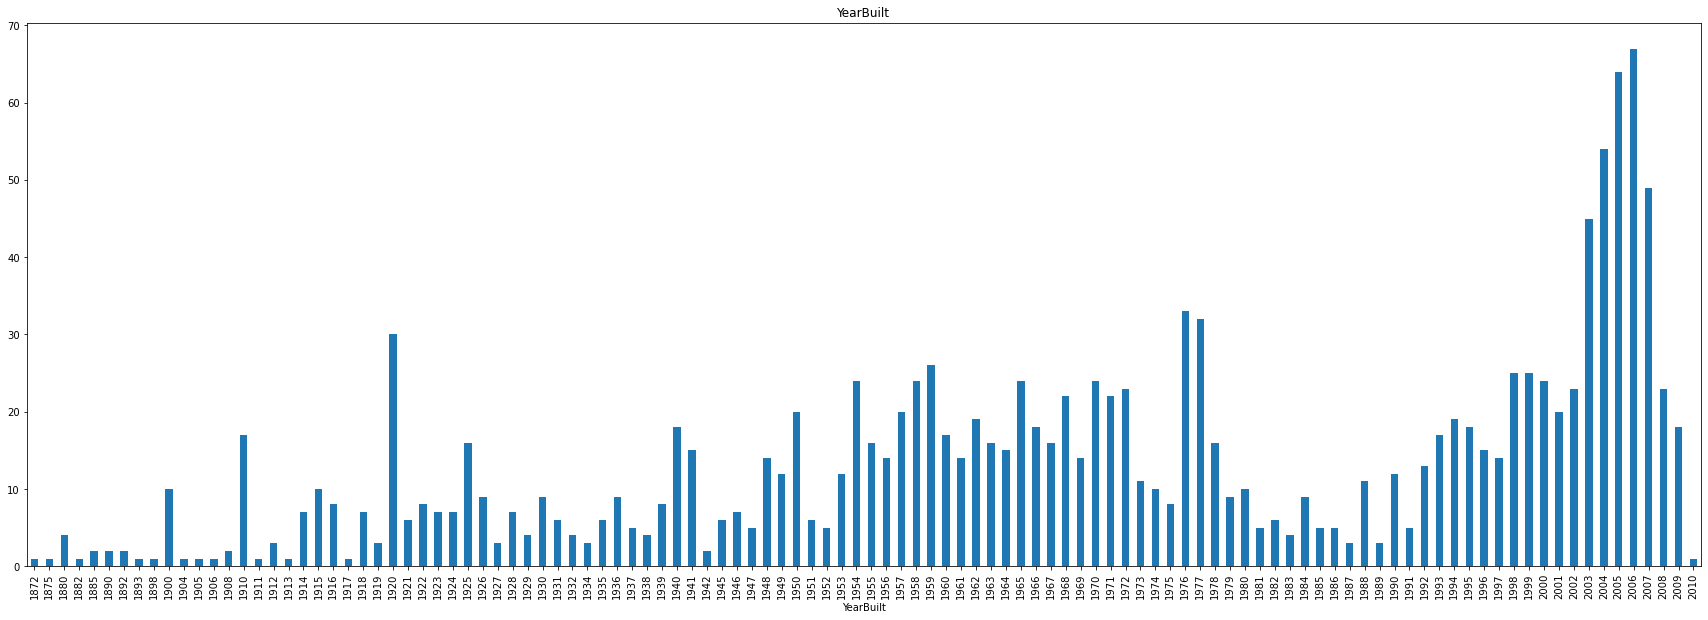

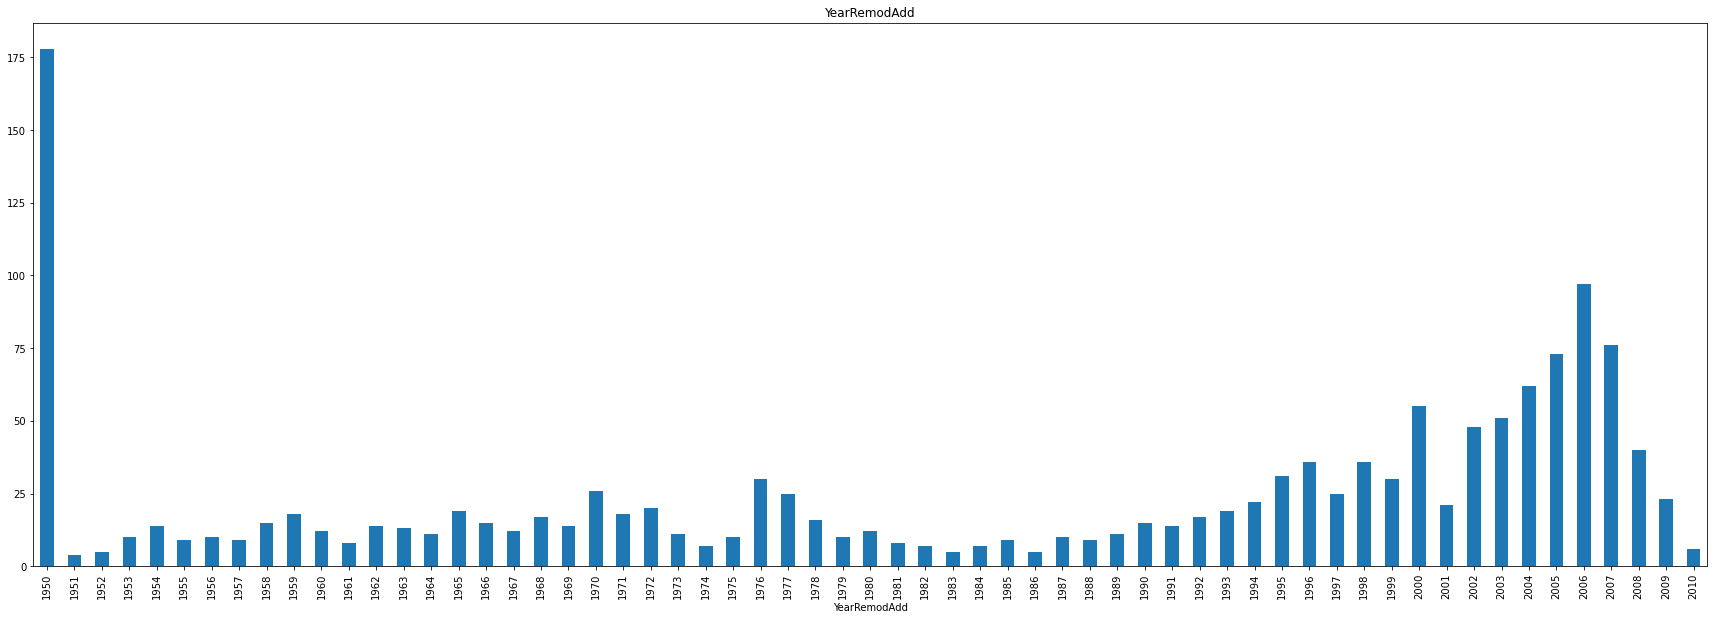

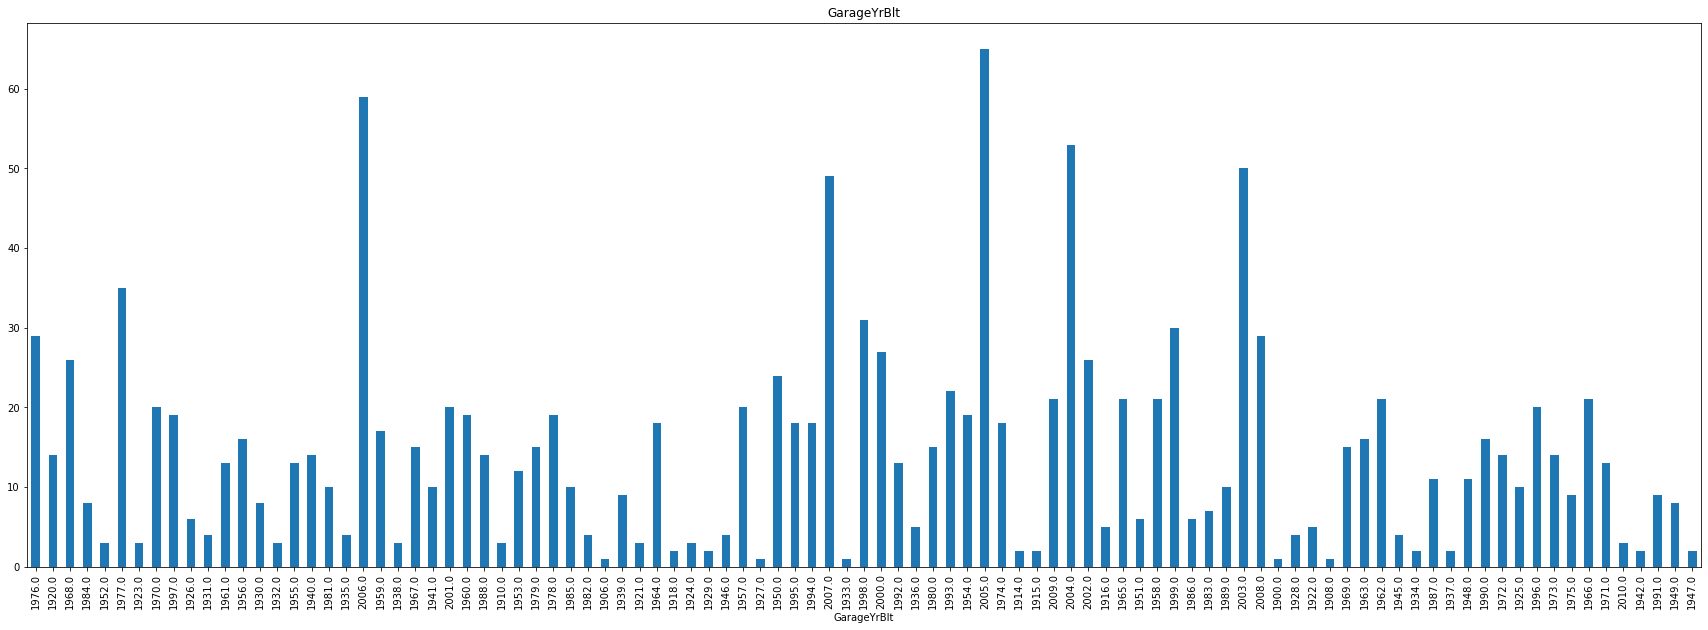

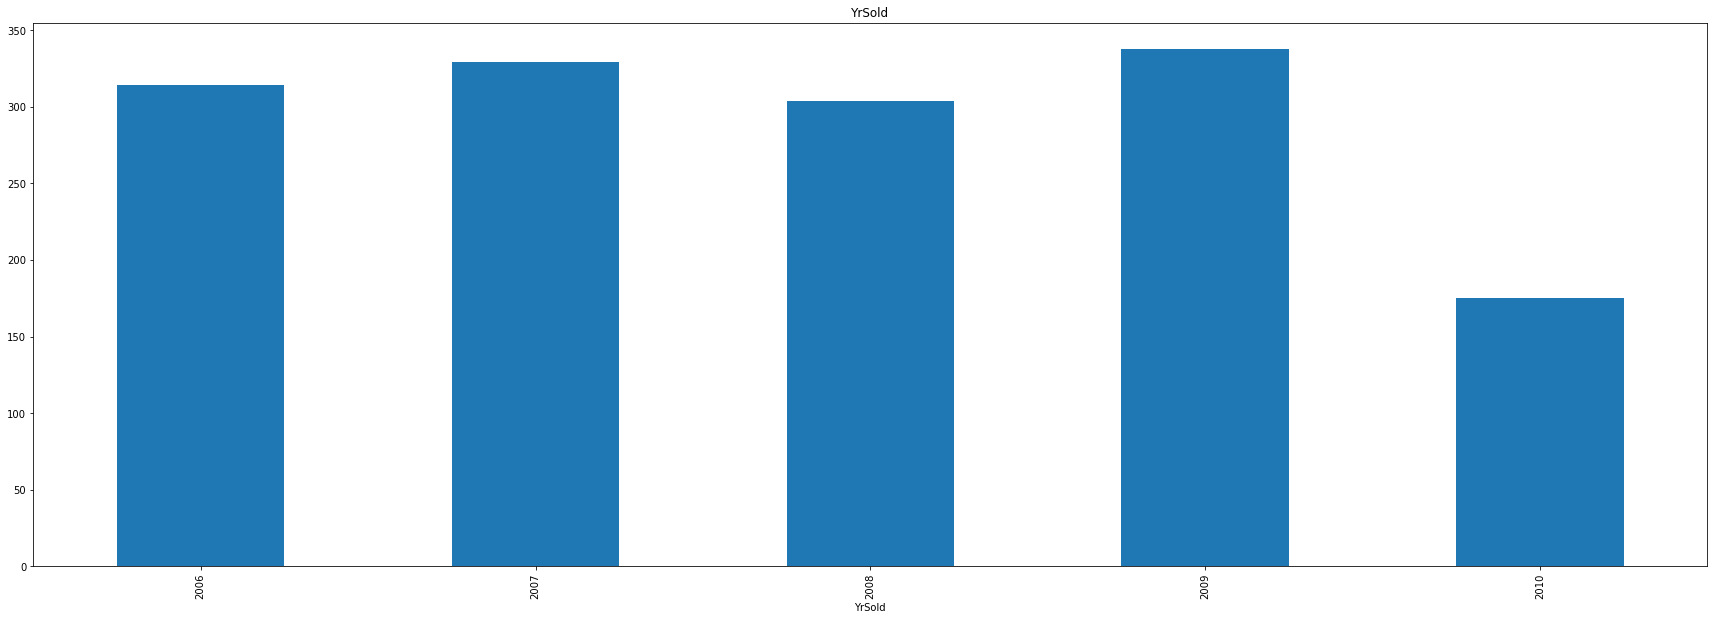

In [ ]:
for fea in year_fea:
  data = df_train.copy()
  data[fea].value_counts(sort=False).plot(kind='bar',figsize=(30,10))
  plt.xlabel(fea)
  plt.title(fea)
  plt.show()

- 위 그래프를 보면서 알 수 있는 것은 무엇일까?
- 우선, 첫 건축 시기는 1872년이고 첫 리모델링 시기는 1950년이고, 마지막으로 첫 차고 건축시기는 1930년으로 확인된다.
- 그리고 매매 시기는 2006-2010년 사이로 집계된 것으로 확인할 수 있다.

### Sale Price 와의 관계

- YrSold에서 그 외 다른 변수와의 연도 시기의 차이를 계산하면 통상적으로 연수가 짧으면 짧을수록 매매가도 올라가고 연수가 길면 길수록 매매가가 하락하는 것을 예상할 수 있다.
- 실제 그러한 그래프를 그리도록 해보자.

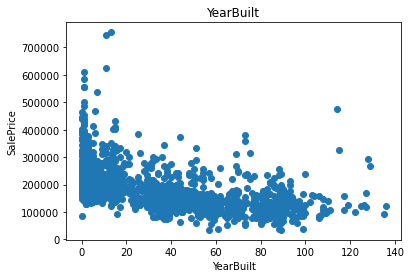

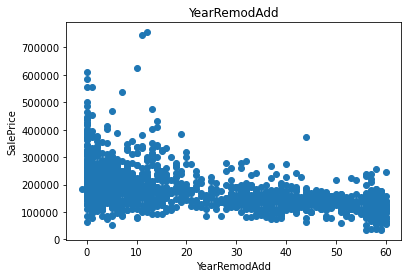

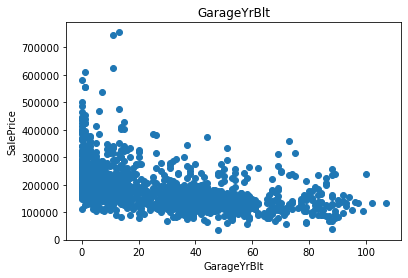

In [ ]:
for fea in year_fea:
    if fea!='YrSold': # `YrSold` 변수는 제외 한다.
        data=df_train.copy() # 이렇게 해주는 것이 좋다. (원본 데이터는 늘 보존할 수 있다)
        data[fea]=data['YrSold']-data[fea] #  여기가 사실 핵심 포인트다. 연수 차이 계산
        plt.scatter(data[fea], data['SalePrice']) # 산점도 그래프를 그린다.
        plt.title(fea)
        plt.xlabel(fea)
        plt.ylabel('SalePrice')
        plt.show()

## 양적 변수 시각화 - 이산형 그래프

- 가상 데이터 설정
     - 우선 데이터셋을 만드는 데, train데이터셋과 유사하게 만들었다.
        - number_of_room은 방의 개수를 의미한다.
        - sales_price는 매매가격을 의미한다.

In [ ]:
# discrete dataframe
temp = pd.DataFrame({'id' : [1,2,3,4,5,6,7,8,9,10],
                    'number_of_room' : [2,4,3,2,4,3,3,3,4,2],
                    'SalePrice' : [1000,1300,2000,1030,2030,2050,2000,5000,3000,3500]
                    })
print(temp)

   id  number_of_room  SalePrice
0   1               2       1000
1   2               4       1300
2   3               3       2000
3   4               2       1030
4   5               4       2030
5   6               3       2050
6   7               3       2000
7   8               3       5000
8   9               4       3000
9  10               2       3500


- number_of_room의 데이터의 시각화를 작성하면 아래와 같다.
-  matplotlib 형태로 작성한다.

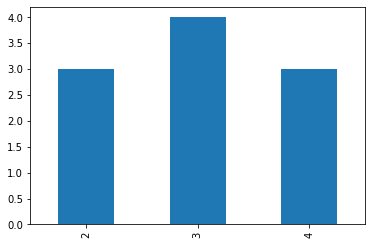

In [ ]:
temp['number_of_room'].value_counts(sort=False).plot.bar()
plt.show()

- seaborn 형식


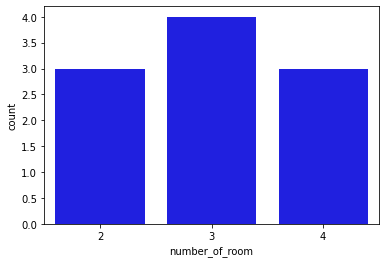

In [ ]:
sns.countplot(
    data= temp,
    x= "number_of_room", 
    color='blue'
)
plt.show()

### 이산형 변수와 Sale Price

- SalePrice와 number_of_room과의 관계 그래프가 중요
- boxplot graph

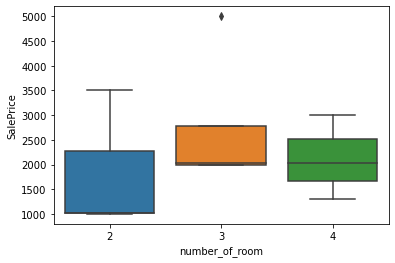

In [ ]:
sns.boxplot(x = "number_of_room", y = "SalePrice", data = temp)
plt.show()

### 실무 데이터 적용

In [ ]:
discrete_vars=[fea for fea in numeric_features if len(df_train[fea].unique()) < 50 and fea not in year_fea + ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_vars)))

Discrete Variables Count: 17


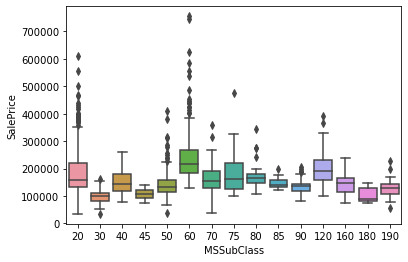

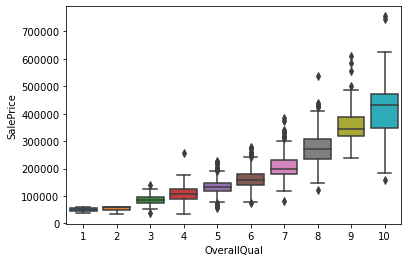

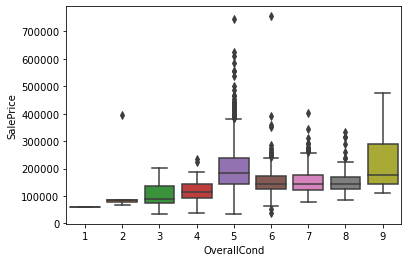

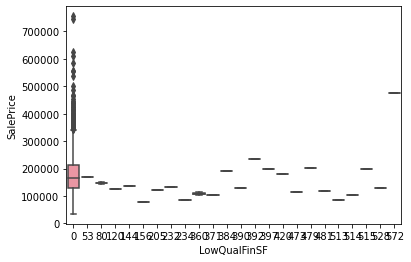

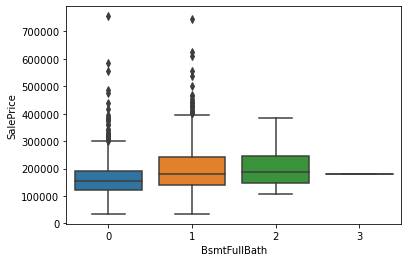

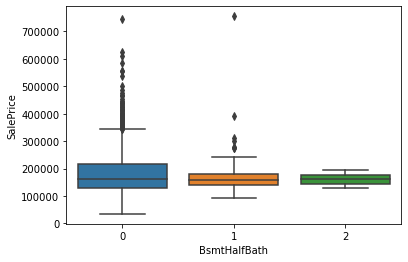

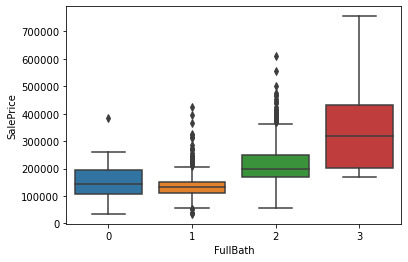

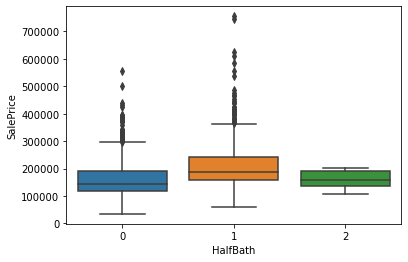

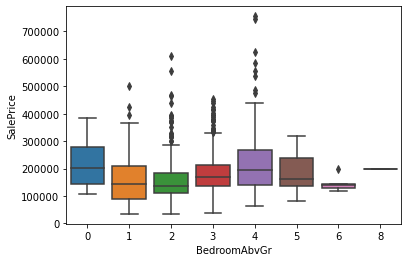

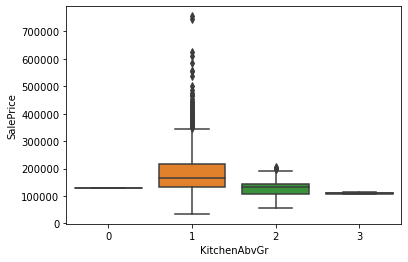

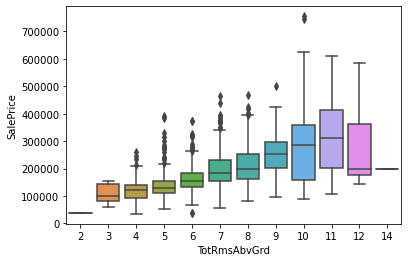

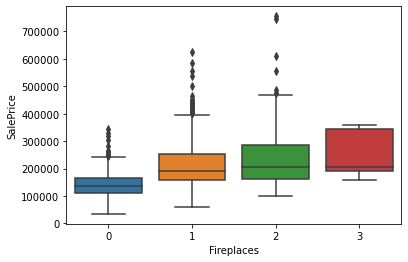

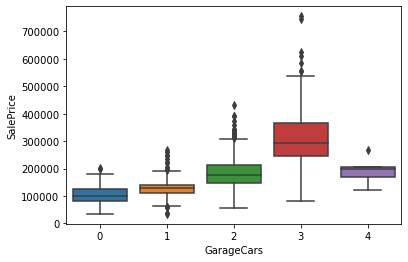

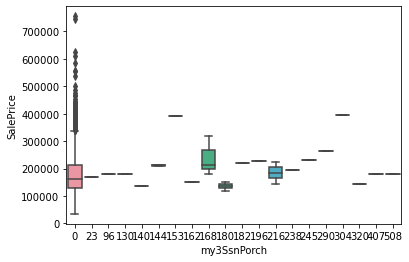

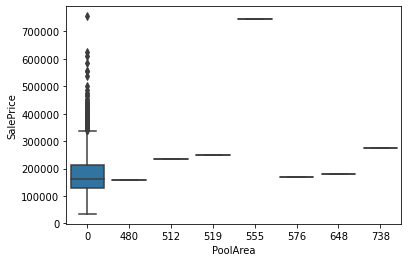

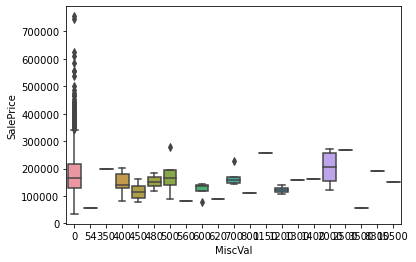

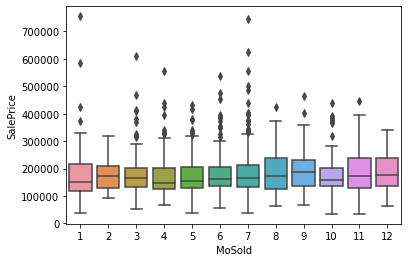

In [ ]:
for fea in discrete_vars:
  data = df_train.copy()
  sns.boxplot(x = fea, y='SalePrice', data = data)
  plt.show()

- 도움되지 않는 그래프 제거

Discrete Variables Count: 14


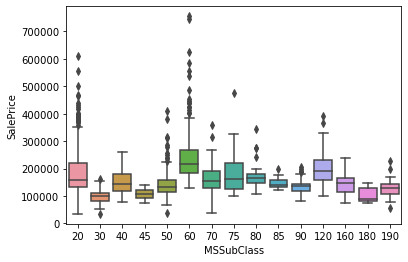

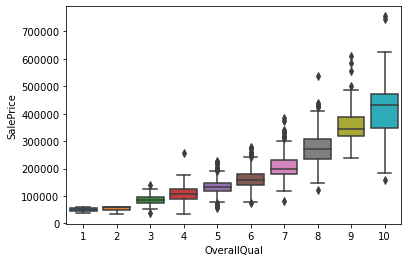

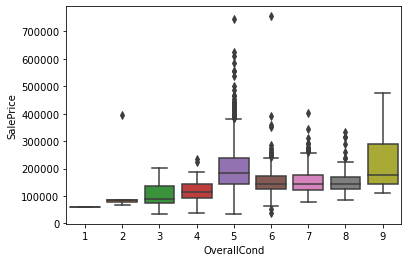

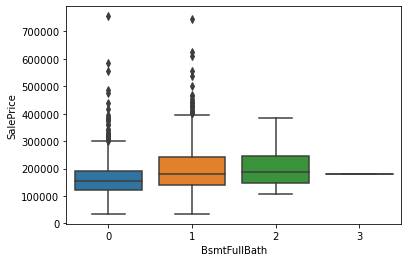

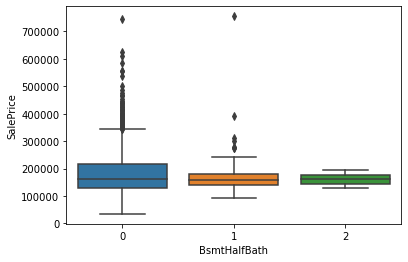

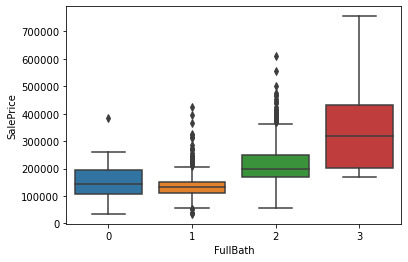

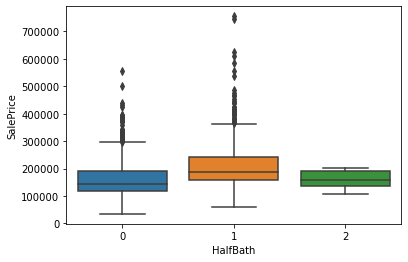

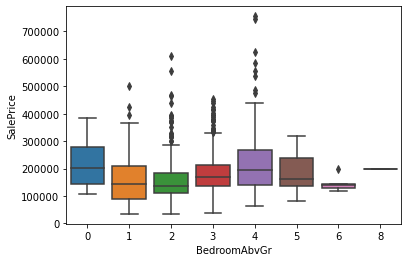

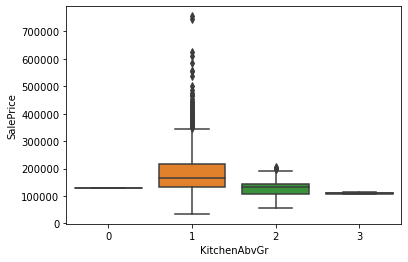

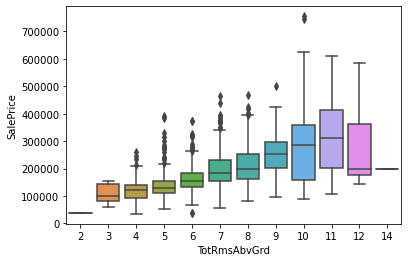

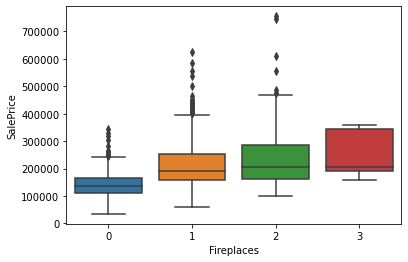

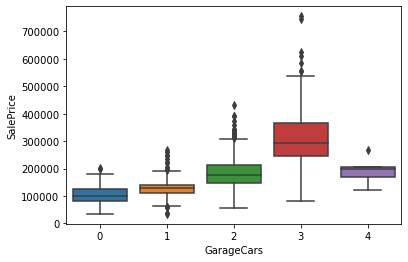

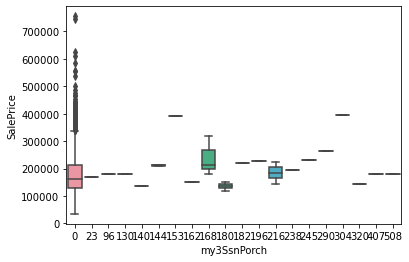

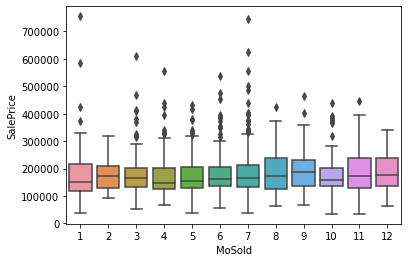

In [ ]:
rem_vars = ['PoolArea', 'LowQualFinSF', 'MiscVal', '3SsnPorch']
discrete_vars=[fea for fea in numeric_features if len(df_train[fea].unique()) < 50 and fea not in year_fea + rem_vars + ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_vars)))

for fea in discrete_vars:
  data = df_train.copy()
  sns.boxplot(x = fea, y='SalePrice', data = data)
  plt.show()

### 양적 변수 시각화 - 연속형 그래프

- 산점도 그래프

In [ ]:
continuous_vars = [fea for fea in numeric_features if fea not in discrete_vars + year_fea + ['Id'] + ['SalePrice']]
print(continuous_vars)
print("The total number of continuous_vars are: ", len(continuous_vars))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'my1stFlrSF', 'my2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
The total number of continuous_vars are:  18


NameError: name 'train' is not defined

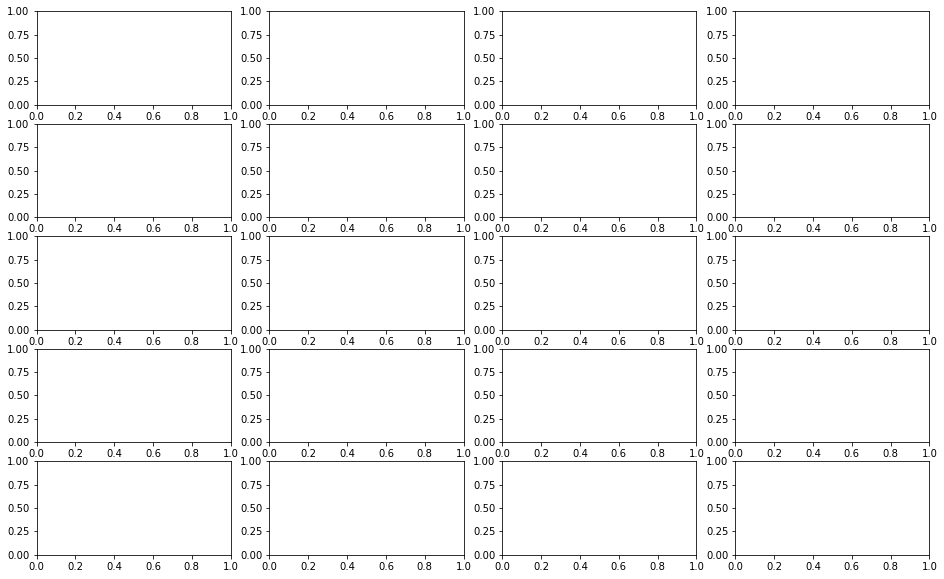

In [ ]:
fig, ax = plt.subplots(5, 4, figsize=(16, 10)) # 그래프의 행과 열 지정 및, 이미지 사이즈 지정
data = df_train.copy()

for i, col in enumerate(data[continuous_vars].columns[0:]): # 좌표 평면 지정
     if i <= 3:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[0,i]) # 1행 좌표 평면
     elif i <= 7:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[1,i-4]) # 2행 좌표 평면
     elif i <= 11:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[2,i-8]) # 3행 좌표 평면
     elif i <= 15:
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[3,i-12]) # 4행 좌표 평면
     else: 
        sns.scatterplot(x=data[col], y=data["SalePrice"], ax=ax[4,i-16]) # 5행 좌표 평면

fig.suptitle('My Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)